In [6]:
import numpy as np
from skimage import io
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage.util import view_as_blocks
from skimage.morphology import disk
from skimage.filters import median
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

import os
import matplotlib.pyplot as plt

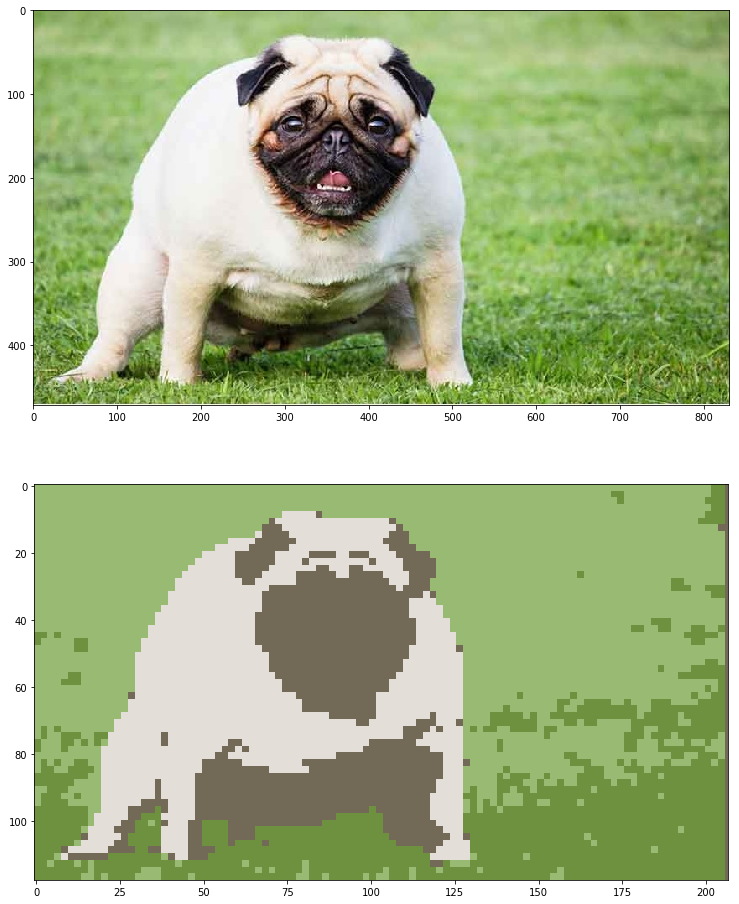

In [30]:
convolutions = np.array([
    [[1, 1, 1, 1],
     [-1, -1, -1, -1],
     [-1, -1, -1, -1],
     [-1, -1, -1, -1]],
    
    [[-1, -1, -1, -1],
     [1, 1, 1, 1],
     [-1, -1, -1, -1],
     [-1, -1, -1, -1]],
    
    [[-1, -1, -1, -1],
     [-1, -1, -1, -1],
     [1, 1, 1, 1],
     [-1, -1, -1, -1]],
    
    [[-1, -1, -1, -1],
     [-1, -1, -1, -1],
     [-1, -1, -1, -1],
     [1, 1, 1, 1]],
    
    
    [[1, -1, -1, -1],
     [1, -1, -1, -1],
     [1, -1, -1, -1],
     [1, -1, -1, -1]],
    
    [[-1, 1, -1, -1],
     [-1, 1, -1, -1],
     [-1, 1, -1, -1],
     [-1, 1, -1, -1]],
    
    [[-1, -1, 1, -1],
     [-1, -1, 1, -1],
     [-1, -1, 1, -1],
     [-1, -1, 1, -1]],
     
    [[-1, -1, -1, 1],
     [-1, -1, -1, 1],
     [-1, -1, -1, 1],
     [-1, -1, -1, 1]],
    
    
    [[-1, -1, -1, -1],
     [-1, -1, -1, -1],
     [1, -1, -1, -1],
     [1, 1, -1, -1]],
    
    [[-1, -1, -1, -1],
     [1, -1, -1, -1],
     [-1, 1, -1, -1],
     [-1, -1, 1, -1]],
    
    [[1, -1, -1, -1],
     [-1, 1, -1, -1],
     [-1, -1, 1, -1],
     [-1, -1, -1, 1]],
    
    [[-1, 1, -1, -1],
     [-1, -1, 1, -1],
     [-1, -1, -1, 1],
     [-1, -1, -1, -1]],
    
    [[-1, -1, 1, 1],
     [-1, -1, -1, 1],
     [-1, -1, -1, -1],
     [-1, -1, -1, -1]],
    
    
    [[-1, -1, -1, -1],
     [-1, -1, -1, -1],
     [-1, -1, -1, 1],
     [-1, -1, 1, 1]],
    
    [[-1, -1, -1, -1],
     [-1, -1, -1, 1],
     [-1, -1, 1, -1],
     [-1, 1, -1, -1]],
    
    [[-1, -1, -1, 1],
     [-1, -1, 1, -1],
     [-1, 1, -1, -1],
     [1, -1, -1, -1]],
    
    [[-1, -1, 1, -1],
     [-1, 1, -1, -1],
     [1, -1, -1, -1],
     [-1, -1, -1, -1]],
    
    [[1, 1, -1, -1],
     [1, -1, -1, -1],
     [-1, -1, -1, -1],
     [-1, -1, -1, -1]], 
    
    
    [[1, -1, -1, 1],
     [-1, 1, 1, -1],
     [-1, 1, 1, -1],
     [1, -1, -1, 1]], 
    
    
    [[1, 1, 1, 1],
     [-1, -1, -1, -1],
     [1, 1, 1, 1],
     [-1, -1, -1, -1]], 
    
    [[-1, -1, -1, -1],
     [1, 1, 1, 1],
     [-1, -1, -1, -1],
     [1, 1, 1, 1]], 
    
    
    [[1, -1, 1, -1],
     [1, -1, 1, -1],
     [1, -1, 1, -1],
     [1, -1, 1, -1]], 
    
    [[-1, 1, -1, 1],
     [-1, 1, -1, 1],
     [-1, 1, -1, 1],
     [-1, 1, -1, 1]], 
    
])
    
solutions = [
    [[[1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 1, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 1, 0, 0],
      [1, 1, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 1, 1],
      [0, 0, 1, 1]],
    ],
    [[[0, 0, 0, 0],
      [1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 1, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 1, 0, 0],
      [1, 1, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 1, 1],
      [0, 0, 1, 1]],
    ],
    [[[1, 1, 0, 0],
      [1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 1, 1],
      [0, 0, 1, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 1, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 1, 1],
      [0, 0, 0, 0]],
    ],
    [[[1, 1, 0, 0],
      [1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 1, 1],
      [0, 0, 1, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 1, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 1, 1]],
    ],
    
    [[[1, 0, 0, 0],
      [1, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[1, 0, 0, 0],
      [1, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
    ],  
    [[[1, 1, 0, 0],
      [1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[1, 1, 0, 0],
      [1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
    ], 
    [[[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 1, 1],
      [0, 0, 1, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 1, 1],
      [0, 0, 1, 1]],
    ], 
    [[[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 1],
      [0, 0, 0, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 1],
      [0, 0, 0, 1]],
    ],
    
    [[[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 1, 0, 0],
      [1, 1, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
    ],
    [[[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 1, 0, 0],
      [1, 1, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
    ],
    [[[1, 1, 0, 0],
      [1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 1, 1],
      [0, 0, 1, 1]],
    ],
    [[[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 1, 1],
      [0, 0, 1, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
    ],
    [[[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 1, 1],
      [0, 0, 1, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
    ],
    
    [[[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 1, 1],
      [0, 0, 1, 1]],
    ],
    [[[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 1, 1],
      [0, 0, 1, 1]],
    ],
    [[[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 1, 1],
      [0, 0, 1, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 1, 0, 0],
      [1, 1, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
    ],
    [[[1, 1, 0, 0],
      [1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
    ],
    [[[1, 1, 0, 0],
      [1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
    ],
    
    [[[1, 1, 0, 0],
      [1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 1, 1],
      [0, 0, 1, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 1, 0, 0],
      [1, 1, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 1, 1],
      [0, 0, 1, 1]],
    ],
    
    [[[1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 1, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 1, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 1, 1]],
    ],
    [[[1, 1, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 1, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 1, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 1, 1]],
    ],
 
    [[[1, 0, 0, 0],
      [1, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 1],
      [0, 0, 0, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 0, 0, 0],
      [1, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 1],
      [0, 0, 0, 1]],
    ],
    [[[1, 0, 0, 0],
      [1, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 1],
      [0, 0, 0, 1],
      [0, 0, 0, 0],
      [0, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [1, 0, 0, 0],
      [1, 0, 0, 0]],
     [[0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 1],
      [0, 0, 0, 1]],
    ],
]


@adapt_rgb(each_channel)
def _reduce(image, n_iter=1, treshold=0):
    # pad image to be size mod 4
    h, w = image.shape
    hm, wm = np.mod(image.shape, 4)
    image = np.pad(image, ((3 - hm if hm else 0, 1 if hm else 0), (3 - wm if wm else 0, 1 if wm else 0)), 'edge')
    image = median(image, disk(4))
    
    for _ in range(n_iter):
        h, w = h // 2, w // 2
        new_image = np.zeros((h, w)).astype("int")
        for x in range(w // 2):
            for y in range(h // 2):
                window = image[y*4:y*4 + 4, x*4:x*4 + 4]
                best = -1
                best_score = -1
                for i, conv in enumerate(convolutions):
                    score = np.sum(np.multiply(window, conv))
                    if score > treshold and score > best_score:
                        best_score = score
                        best = i
                if best == -1:
                    new_image[y*2:y*2 + 2, x*2:x*2 + 2] = np.median(window, axis=None)
                else:
                    new_image[y*2, x*2] = np.median(window[np.array(solutions[best][0])], axis=None)
                    new_image[y*2, x*2 + 1] = np.median(window[np.array(solutions[best][1])], axis=None)
                    new_image[y*2 + 1, x*2] = np.median(window[np.array(solutions[best][2])], axis=None)
                    new_image[y*2 + 1, x*2 + 1] = np.median(window[np.array(solutions[best][3])], axis=None)
        
        #view = view_as_blocks(image, (4, 4))
        #new_image += np.median(view, axis=1).astype("int")
        image = new_image.copy()
    return new_image

def pyxelate(image, n_colors=8, n_iter=1, random_state=0):
    from sklearn.mixture import BayesianGaussianMixture
    from skimage.color import rgb2hsv, hsv2rgb
    width, height, depth = image.shape
    reshaped = np.reshape(image, (width * height, depth))
    model = BayesianGaussianMixture(n_components=n_colors, covariance_type="full").fit(shuffle(reshaped, random_state=random_state)[:1000])
    
    image = _reduce(image, n_iter)
    
    width, height, depth = image.shape
    reshaped = np.reshape(image, (width * height, depth))
    labels = model.predict(reshaped)
    palette = model.means_ #cluster_centers_
    image = np.reshape(palette[labels], (width, height, depth))
    return np.clip(image, 0, 255).astype("int")


img = io.imread("eb.jpg")
_, axes = plt.subplots(2, 1, figsize=(16, 16))
axes[0].imshow(img)
axes[1].imshow(pyxelate(img, 4, 2))

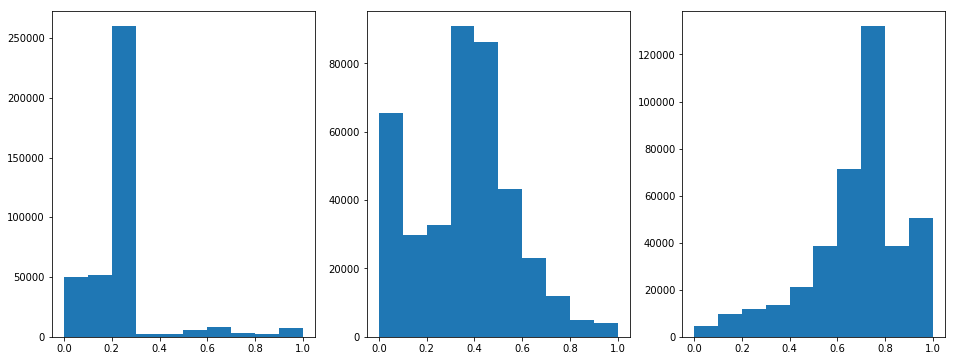

In [5]:
from skimage.color import rgb2hsv    
    
img = io.imread("eb.jpg")
img = rgb2hsv(img)
_, axes = plt.subplots(1, 3, figsize=(16, 6))
for i in range(3):
    axes[i].hist(img[:, :, i].ravel())